## MMS Basic Tail Science

This notebook is for basic tail science figures (from EVA, first plot); based on the IDL crib sheet: mms_basic_tail.pro

Generates a figure containing:
1. AE
2. FGM, srvy, GSM
3. FGM Bz
4. FGM magnitude
5. EDP, -log(scpot)
6. FPI N (ion/electron density)
7. FPI Vi (ion velocity, 3 components)
8. (ExB) -> x, y, z
9. J total
10. EIS protons
11. FPI ion spectra
12. HPCA O+
13. FEEPS intensity
14. FPI electron spectra
15. EDP X, Y, Z
16. EDP HFESP
17. DSP BPSD

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [ ]:
!pip install pyspedas

     |████████████████████████████████| 841 kB 5.3 MB/s 
     |████████████████████████████████| 113 kB 13.3 MB/s 
     |████████████████████████████████| 15.4 MB 811 kB/s 
     |████████████████████████████████| 83 kB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41 kB 504 kB/s 
  Created wheel for cdflib: filename=cdflib-0.4.4-py3-none-any.whl size=79239 sha256=9df10107ed1ca0093f5f2a0fbcb89c3f2b82e40bf3c8b6631600a23a09e40641
  Stored in directory: /root/.cache/pip/wheels/58/1f/02/5567c76a728aeb17cb09350093fbc70787014ca1740f50e862
  Created wheel for hapiclient: filename=hapiclient-0.2.3-py3-none-any.whl size=30736 sha256=8ea857990430ced61aa4a3ac7bf85cdd1aec23c5a1cf325acf49ad75f7e3def5
  Stored in directory: /root/.cache/pip/wheels/e6/fb/07/878e46dae2a859e5064c0806df12d152207eb4ba4bed5286d3
Successfully built cdflib hapiclient


In [ ]:
import pyspedas
import numpy as np
from pytplot import tplot, options, get_data, store_data

Set some data options

In [ ]:
trange = ['2015-10-16', '2015-10-17']
probe = '1'

Load the data

In [ ]:
pyspedas.omni.data(trange=trange)
pyspedas.mms.fgm(trange=trange, probe=[1, 2, 3, 4], data_rate='srvy', level='l2', time_clip=True, get_fgm_ephemeris=True)
pyspedas.mms.mec(trange=trange, probe=probe, data_rate='srvy', level='l2', time_clip=True)
pyspedas.mms.fpi(trange=trange, probe=probe, data_rate='fast', level='l2', datatype=['des-moms', 'dis-moms'], time_clip=True)
pyspedas.mms.edp(trange=trange, probe=probe, datatype='scpot', level='l2', time_clip=True)
pyspedas.mms.edp(trange=trange, probe=probe, datatype='dce', data_rate='fast', time_clip=True)
pyspedas.mms.edp(trange=trange, probe=probe, datatype=['dce', 'hfesp'], data_rate='srvy', level='l2', time_clip=True)
pyspedas.mms.dsp(trange=trange, probe=probe, datatype='bpsd', data_rate='fast', level='l2', time_clip=True)
pyspedas.mms.hpca(trange=trange, probe=probe, datatype='ion', data_rate='srvy', level='l2', time_clip=True)
pyspedas.mms.eis(trange=trange, probe=probe, datatype='extof', time_clip=True)
pyspedas.mms.feeps(trange=trange, probe=probe, datatype='electron', time_clip=True)

28-Mar-22 17:00:05: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2015/
28-Mar-22 17:00:06: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf to omni_data/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf
28-Mar-22 17:00:06: Download complete: omni_data/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf
28-Mar-22 17:00:06: /usr/local/lib/python3.7/dist-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)



Time clip was applied to: IMF
Time clip was applied to: PLS
Time clip was applied to: IMF_PTS
Time clip was applied to: PLS_PTS
Time clip was applied to: percent_interp
Time clip was applied to: Timeshift
Time clip was applied to: RMS_Timeshift
Time clip was applied to: RMS_phase
Time clip was applied to: Time_btwn_obs
Time clip was applied to: F
Time clip was applied to: BX_GSE
Time clip was applied to: BY_GSE
Time clip was applied to: BZ_GSE
Time clip was applied to: BY_GSM
Time clip was applied to: BZ_GSM
Time clip was applied to: RMS_SD_B
Time clip was applied to: RMS_SD_fld_vec
Time clip was applied to: flow_speed
Time clip was applied to: Vx
Time clip was applied to: Vy
Time clip was applied to: Vz
Time clip was applied to: proton_density
Time clip was applied to: T
Time clip was applied to: NaNp_Ratio
Time clip was applied to: Pressure
Time clip was applied to: E
Time clip was applied to: Beta
Time clip was applied to: Mach_num
Time clip was applied to: Mgs_mach_num
Time clip wa

28-Mar-22 17:19:35: /usr/local/lib/python3.7/dist-packages/pyspedas/mms/mms_login_lasp.py:69: ResourceWarning: unclosed file <_io.BufferedWriter name='/root/mms_auth_info.pkl'>
  saved_auth = pickle.dump({'user': user, 'passwd': passwd}, open(os.sep.join([homedir, 'mms_auth_info.pkl']), 'wb'))

28-Mar-22 17:19:35: Downloading mms1_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms1/fgm/srvy/l2/2015/10
28-Mar-22 17:19:36: Downloading mms2_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms2/fgm/srvy/l2/2015/10
28-Mar-22 17:19:37: Downloading mms3_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms3/fgm/srvy/l2/2015/10
28-Mar-22 17:19:37: Downloading mms4_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms4/fgm/srvy/l2/2015/10
28-Mar-22 17:19:38: /usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)



The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplo

28-Mar-22 17:21:22: Downloading mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms1/mec/srvy/l2/epht89q/2015/10


Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_r_gse_srvy_l2
mms1_fgm_r_gsm_srvy_l2
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
mms2_fgm_b_gse_srvy_l2
mms2_fgm_b_gsm_srvy_l2
mms2_fgm_b_dmpa_srvy_l2
mms2_fgm_b_bcs_srvy_l2
mms2_fgm_flag_srvy_l2
mms2_fgm_r_gse_srvy_l2
mms2_fgm_r_gsm_srvy_l2
mms2_fgm_hirange_srvy_l2
mms2_fgm_bdeltahalf_srvy_l2
mms2_fgm_stemp_srvy_l2
mms2_fgm_etemp_srvy_l2
mms2_fgm_mode_srvy_l2
mms2_fgm_rdeltahalf_srvy_l2
mms3_fgm_b_gse_srvy_l2
mms3_fgm_b_gsm_srvy_l2
mms3_fgm_b_dmpa_srvy_l2
mms3_fgm_b_bcs_srvy_l2
mms3_fgm_flag_srvy_l2
mms3_fgm_r_gse_srvy_l2
mms3_fgm_r_gsm_srvy_l2
mms3_fgm_hirange_srvy_l2
mms3_fgm_bdeltahalf_srvy_l2
mms3_fgm_stemp_srvy_l2
mms3_fgm_etemp_srvy_l2
mms3_fgm_mode_srvy_l2
mms3_fgm_rdeltahalf_srvy_l2
mms4_fgm_b_gse_srvy_l2
mms4_fgm_b_

28-Mar-22 17:21:24: Downloading mms1_fpi_fast_l2_des-moms_20151016040000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_des-moms_20151016060000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_des-moms_20151016080000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_des-moms_20151016100000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_des-moms_20151016120000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_des-moms_20151016140000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_des-moms_20151016160000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
28-Mar-22 17:21:25: Downloading mms1_fpi_fast_l2_dis-moms_20151016040000_v3.3.0.cdf to pydata/mms1/fpi/f

Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip 

28-Mar-22 17:21:31: Downloading mms1_edp_fast_l2_scpot_20151016000000_v2.7.0.cdf to pydata/mms1/edp/fast/l2/scpot/2015/10



mms1_des_energyspectr_mx_fast
mms1_des_energyspectr_py_fast
mms1_des_energyspectr_my_fast
mms1_des_energyspectr_pz_fast
mms1_des_energyspectr_mz_fast
mms1_des_energyspectr_par_fast
mms1_des_energyspectr_anti_fast
mms1_des_energyspectr_perp_fast
mms1_des_energyspectr_omni_fast
mms1_des_numberdensity_fast
mms1_des_numberdensity_err_fast
mms1_des_densityextrapolation_low_fast
mms1_des_densityextrapolation_high_fast
mms1_des_bulkv_dbcs_fast
mms1_des_bulkv_spintone_dbcs_fast
mms1_des_bulkv_gse_fast
mms1_des_bulkv_spintone_gse_fast
mms1_des_bulkv_err_fast
mms1_des_prestensor_dbcs_fast
mms1_des_prestensor_gse_fast
mms1_des_prestensor_err_fast
mms1_des_temptensor_dbcs_fast
mms1_des_temptensor_gse_fast
mms1_des_temptensor_err_fast
mms1_des_heatq_dbcs_fast
mms1_des_heatq_gse_fast
mms1_des_heatq_err_fast
mms1_des_alpha_fast
mms1_des_alpha_delta_fast
mms1_des_energy_fast
mms1_des_energy_delta_fast
mms1_des_temppara_fast
mms1_des_tempperp_fast
mms1_dis_errorflags_fast
mms1_dis_compressionloss_fast

28-Mar-22 17:21:38: Downloading mms1_edp_fast_l2_dce_20151016_v2.1.0.cdf to pydata/mms1/edp/fast/l2/dce/2015/10


Time clip returns full data set.
Loaded variables:
mms1_edp_scpot_fast_l2
mms1_edp_psp_fast_l2
mms1_edp_dcv_fast_l2
Time clip returns full data set.
Time clip returns full data set.


28-Mar-22 17:21:46: Searching for local files...


Time clip returns full data set.
Loaded variables:
mms1_edp_dce_gse_fast_l2
mms1_edp_dce_dsl_fast_l2
mms1_edp_dce_par_epar_fast_l2


28-Mar-22 17:21:46: Downloading mms1_edp_srvy_l2_hfesp_20151016_v0.4.0.cdf to pydata/mms1/edp/srvy/l2/hfesp/2015/10
28-Mar-22 17:21:47: Downloading mms1_dsp_fast_l2_bpsd_20151016_v2.1.1.cdf to pydata/mms1/dsp/fast/l2/bpsd/2015/10


Time clip returns full data set.
Loaded variables:
mms1_edp_hfesp_srvy_l2


28-Mar-22 17:21:49: Downloading mms1_hpca_srvy_l2_ion_20151016000000_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2015/10


Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Loaded variables:
mms1_dsp_bpsd_scm1_fast_l2
mms1_dsp_bpsd_scm2_fast_l2
mms1_dsp_bpsd_scm3_fast_l2
mms1_dsp_bpsd_omni_fast_l2


28-Mar-22 17:21:49: Downloading mms1_hpca_srvy_l2_ion_20151016022700_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2015/10
28-Mar-22 17:21:50: Downloading mms1_hpca_srvy_l2_ion_20151016060000_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2015/10
28-Mar-22 17:21:52: Downloading mms1_hpca_srvy_l2_ion_20151016120000_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2015/10
28-Mar-22 17:21:54: Downloading mms1_hpca_srvy_l2_ion_20151016180000_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2015/10
28-Mar-22 17:21:55: Downloading mms1_hpca_srvy_l2_ion_20151016211700_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2015/10


Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.


28-Mar-22 17:22:45: Found energy table with all 0s: mms1_hpca_hplus_flux; using hard-coded energy table instead
28-Mar-22 17:22:45: Found energy table with all 0s: mms1_hpca_hplus_phase_space_density; using hard-coded energy table instead
28-Mar-22 17:22:46: Found energy table with all 0s: mms1_hpca_heplus_flux; using hard-coded energy table instead
28-Mar-22 17:22:46: Found energy table with all 0s: mms1_hpca_heplus_phase_space_density; using hard-coded energy table instead
28-Mar-22 17:22:47: Found energy table with all 0s: mms1_hpca_heplusplus_flux; using hard-coded energy table instead
28-Mar-22 17:22:47: Found energy table with all 0s: mms1_hpca_heplusplus_phase_space_density; using hard-coded energy table instead
28-Mar-22 17:22:47: Found energy table with all 0s: mms1_hpca_oplus_flux; using hard-coded energy table instead
28-Mar-22 17:22:48: Found energy table with all 0s: mms1_hpca_oplus_phase_space_density; using hard-coded energy table instead
28-Mar-22 17:22:48: Downloading 

Loaded variables:
Epoch
Epoch_MINUS
Epoch_PLUS
mms1_hpca_polar_anode_number
mms1_hpca_azimuth_decimation_factor
mms1_hpca_polar_decimation_factor
mms1_hpca_energy_decimation_factor
mms1_hpca_sweep_table_number
mms1_hpca_start_azimuth
mms1_hpca_science_mode
mms1_hpca_ion_energy
mms1_hpca_hplus_flux
mms1_hpca_hplus_phase_space_density
mms1_hpca_heplus_flux
mms1_hpca_heplus_phase_space_density
mms1_hpca_heplusplus_flux
mms1_hpca_heplusplus_phase_space_density
mms1_hpca_oplus_flux
mms1_hpca_oplus_phase_space_density
mms1_hpca_B_GSE_sweep_avg
mms1_hpca_B_GSM_sweep_avg
Epoch_Angles
Epoch_MINUS_Angles
Epoch_PLUS_Angles
mms1_hpca_azimuth_angles_degrees
mms1_hpca_azimuth_angles_per_ev_degrees
mms1_hpca_centroid_elevation_angle
mms1_hpca_azimuth_index
mms1_hpca_energy_step_number
mms1_hpca_MCP_VMON_MIN_converted
mms1_hpca_TOF_VMON_MIN_converted
mms1_hpca_decimation_factor_index
mms1_hpca_acquisition_time
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full dat

28-Mar-22 17:22:59: Problem calculating the spin-average for species: alpha (extof)
28-Mar-22 17:22:59: Error, problem finding the telescopes to calculate omni-directional spectrograms
28-Mar-22 17:22:59: Error, problem finding the telescopes to calculate omni-directional spectrograms


That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
Time_Minus
Time_Plus
mms1_epd_eis_srvy_l2_extof_duration
mms1_epd_eis_srvy_l2_extof_deadtime
mms1_epd_eis_srvy_l2_extof_largepixel
mms1_epd_eis_srvy_l2_extof_starttai
mms1_epd_eis_srvy_l2_extof_midtai
mms1_epd_eis_srvy_l2_extof_endtai
mms1_epd_eis_srvy_l2_extof_spin
mms1_epd_eis_srvy_l2_extof_sector
mms1_epd_eis_srvy_l2_extof_quality
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t0
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t1
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t2
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t3
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t4
mms1_epd_eis_srvy_l2_extof_proton_P3_counts_t5
mms1_epd_eis_srv

28-Mar-22 17:22:59: Downloading mms1_feeps_srvy_l2_electron_20151016000000_v6.1.2.cdf to pydata/mms1/feeps/srvy/l2/electron/2015/10


mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_1 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_2 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_9 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_10 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_1 contains negative values; setting the z-axis to log scale will cause the negative values to be ignored on figures.
mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_2 contains negative values; setting the z-axis to log scale will cause the neg

['mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_1',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_2',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_3',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_4',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_5',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_9',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_10',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_11',
 'mms1_epd_feeps_srvy_l2_electron_top_intensity_sensorid_12',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_1',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_2',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_3',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_4',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_5',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_9',
 'mms1_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_10',

Sum the HPCA spectra over the full field of view

In [ ]:
from pyspedas import mms_hpca_calc_anodes

mms_hpca_calc_anodes(probe=probe, fov=[0, 360])

['mms1_hpca_hplus_flux_elev_0-360',
 'mms1_hpca_heplus_flux_elev_0-360',
 'mms1_hpca_heplusplus_flux_elev_0-360',
 'mms1_hpca_oplus_flux_elev_0-360']

Split the B-field into its components (so we can plot Bz in its own panel)

In [ ]:
from pytplot import split_vec

split_vec('mms'+probe+'_fgm_b_gsm_srvy_l2_bvec')

options('mms'+probe+'_fgm_b_gsm_srvy_l2_bvec_z', 'color', 'red')
options('mms'+probe+'_fgm_b_gsm_srvy_l2_bvec_z', 'legend_names', 'Bz GSM')
options('mms'+probe+'_fgm_b_gsm_srvy_l2_bvec_z', 'ytitle', 'MMS' + probe + ' FGM')
options('mms'+probe+'_fgm_b_gsm_srvy_l2_bvec_z', 'ysubtitle', '[nT]')

Join the FPI electron and ion densities into a single variable

In [ ]:
from pytplot import join_vec

join_vec(['mms'+probe+'_des_numberdensity_fast', 'mms'+probe+'_dis_numberdensity_fast'], new_tvar='mms'+probe+'_fpi_combined_density')
options('mms'+probe+'_fpi_combined_density', 'color', ['blue', 'green'])
options('mms'+probe+'_fpi_combined_density', 'legend_names', ['N, electrons', 'N, ions'])

EVA plots -ln(scpot)

In [ ]:
scpot_data = get_data('mms'+probe+'_edp_scpot_fast_l2')
scpot_metadata = get_data('mms'+probe+'_edp_scpot_fast_l2', metadata=True)

store_data('mms'+probe+'_edp_scpot_fast_l2_ln', data={'x': scpot_data.times, 'y': -np.log(scpot_data.y)}, attr_dict=scpot_metadata)

True

Calculate ExB

In [ ]:
from pyspedas import tinterpol

# E has a higher time resolution than B
# Here, we interpolate B so that its timestamps will match with those of E
tinterpol('mms'+probe+'_fgm_b_gse_srvy_l2_bvec', 'mms'+probe+'_edp_dce_gse_fast_l2')

from pyspedas.analysis.tcrossp import tcrossp

tcrossp('mms'+probe+'_edp_dce_gse_fast_l2', 'mms'+probe+'_fgm_b_gse_srvy_l2_bvec-itrp', newname='mms'+probe+'_exb_gse')

options('mms'+probe+'_exb_gse', 'legend_names', ['(ExB)x','(ExB)y','(ExB)z'])
options('mms'+probe+'_exb_gse', 'ytitle', 'MMS'+probe+' ExB')
options('mms'+probe+'_exb_gse', 'ysubtitle', '[km/s]')
options('mms'+probe+'_exb_gse', 'legend_names', ['(ExB)x','(ExB)y','(ExB)z'])

tinterpol (linear) was applied to: mms1_fgm_b_gse_srvy_l2_bvec-itrp


Compare with FPI

In [ ]:
# V has a much lower time resolution than B
# Here, we keep the lower time resolution by interpolating B.
tinterpol('mms'+probe+'_fgm_b_gse_srvy_l2_bvec', 'mms'+probe+'_dis_bulkv_gse_fast')

# calculate Vperp
bulkv = get_data('mms'+probe+'_dis_bulkv_gse_fast')
bfield = get_data('mms'+probe+'_fgm_b_gse_srvy_l2_bvec-itrp')
Vperp = np.zeros((len(bulkv.times), 3))

iwB2 = 1/(bfield.y[:, 0]**2+bfield.y[:, 1]**2+bfield.y[:, 2]**2)
BdotV = iwB2*(bfield.y[:, 0]*bulkv.y[:, 0] + bfield.y[:, 1]*bulkv.y[:, 1] + bfield.y[:, 2]*bulkv.y[:, 2])

# interpolate the ExB data to the bulk velocity timestamps
tinterpol('mms'+probe+'_exb_gse', 'mms'+probe+'_dis_bulkv_gse_fast')
exb =  get_data('mms'+probe+'_exb_gse-itrp')

Vperp[:, 0] = bulkv.y[:, 0] - BdotV*bfield.y[:, 0]
Vperp[:, 1] = bulkv.y[:, 1] - BdotV*bfield.y[:, 1]
Vperp[:, 2] = bulkv.y[:, 2] - BdotV*bfield.y[:, 2]

# combine (ExB)z and (Vperp)z
# the IDL crib sheet only plots the z-component of ExB/Vperp
combined =  np.zeros((len(exb.times), 2))
combined[:, 0] = exb.y[:, 2]
combined[:, 1] = Vperp[:, 2]
store_data('mms'+probe+'_exb_vperp_z', data={'x': bulkv.times, 'y': combined})
options('mms'+probe+'_exb_vperp_z', 'legend_names', ['(ExB)z', 'Vperp,z'])
options('mms'+probe+'_exb_vperp_z', 'Color', ['r', 'k'])

tinterpol (linear) was applied to: mms1_fgm_b_gse_srvy_l2_bvec-itrp
tinterpol (linear) was applied to: mms1_exb_gse-itrp


Curlometer calculations

In [ ]:
from pyspedas.mms import curlometer

fields = ['mms' + prb + '_fgm_b_gse_srvy_l2_bvec' for prb in ['1', '2', '3', '4']]
positions = ['mms' + prb + '_fgm_r_gse_srvy_l2' for prb in ['1', '2', '3', '4']]
curlometer(fields=fields, positions=positions)

tinterpol (linear) was applied to: mms2_fgm_b_gse_srvy_l2_bvec_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_srvy_l2_bvec_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_srvy_l2_bvec_i
tinterpol (linear) was applied to: mms1_fgm_r_gse_srvy_l2_i
tinterpol (linear) was applied to: mms2_fgm_r_gse_srvy_l2_i
tinterpol (linear) was applied to: mms3_fgm_r_gse_srvy_l2_i
tinterpol (linear) was applied to: mms4_fgm_r_gse_srvy_l2_i


['baryb', 'curlB', 'divB', 'jtotal', 'jpar', 'jperp', 'alpha', 'alphaparallel']

Put the ephemeris data at the bottom

In [ ]:
eph_variable = 'mms'+probe+'_mec_r_gsm'

from pyspedas import tkm2re

tkm2re(eph_variable)

from pytplot import split_vec
position_vars = split_vec(eph_variable+'_re')

options('mms1_mec_r_gsm_re_x', 'ytitle', 'X-GSM (Re)')
options('mms1_mec_r_gsm_re_y', 'ytitle', 'Y-GSM (Re)')
options('mms1_mec_r_gsm_re_z', 'ytitle', 'Z-GSM (Re)')

Create the figure

28-Mar-22 17:34:19: /usr/local/lib/python3.7/dist-packages/pytplot/MPLPlotter/tplot.py:373: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)



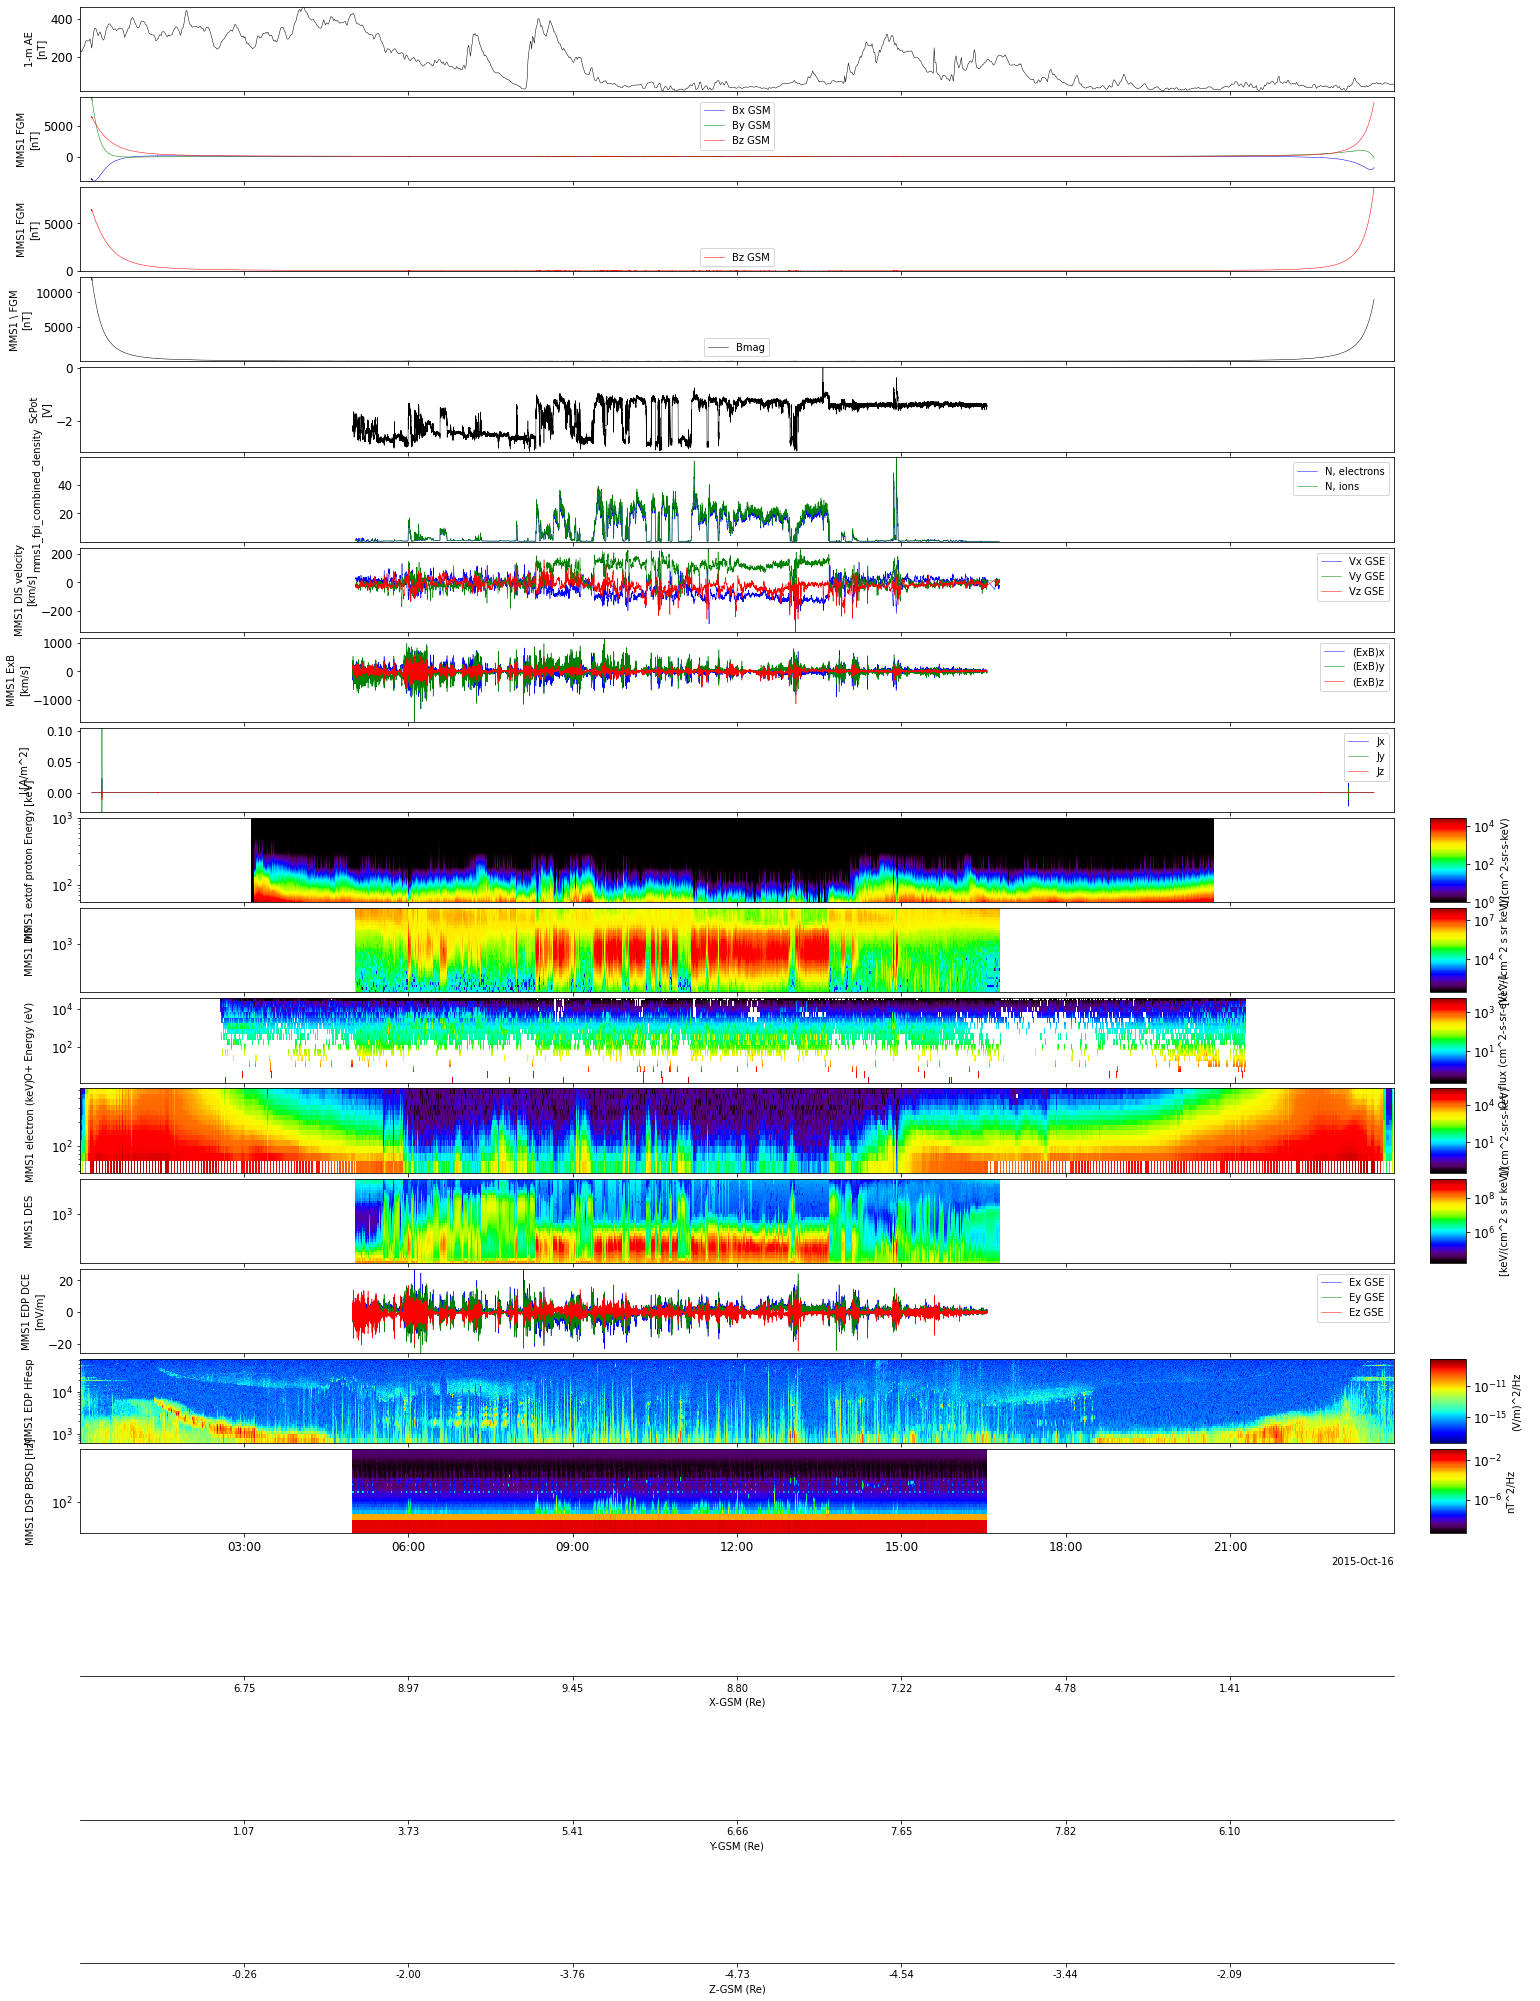

In [ ]:
tplot(['AE_INDEX',
       'mms'+probe+'_fgm_b_gsm_srvy_l2_bvec',
       'mms'+probe+'_fgm_b_gsm_srvy_l2_bvec_z',
       'mms'+probe+'_fgm_b_gsm_srvy_l2_btot',
       'mms'+probe+'_edp_scpot_fast_l2_ln',
       'mms'+probe+'_fpi_combined_density',
       'mms'+probe+'_dis_bulkv_gse_fast',
       'mms'+probe+'_exb_gse',
       'jtotal',
       'mms'+probe+'_epd_eis_srvy_l2_extof_proton_flux_omni',
       'mms'+probe+'_dis_energyspectr_omni_fast',
       'mms'+probe+'_hpca_oplus_flux_elev_0-360',
       'mms'+probe+'_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms'+probe+'_des_energyspectr_omni_fast',
       'mms'+probe+'_edp_dce_gse_fast_l2',
       'mms'+probe+'_edp_hfesp_srvy_l2',
       'mms'+probe+'_dsp_bpsd_omni_fast_l2'], 
       var_label=position_vars,
       xsize=25, ysize=40)